In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

#import dataset
df = pd.read_csv('diabetes.csv')

#Encode Smoking_history variable
df['smoking_history'] = df['smoking_history'].replace('never', 1)
df['smoking_history'] = df['smoking_history'].replace('not current', 2)
df['smoking_history'] = df['smoking_history'].replace('former', 3)
df['smoking_history'] = df['smoking_history'].replace('current',4)
df['smoking_history'] = df['smoking_history'].replace('ever', 5)
df['smoking_history'] = df['smoking_history'].replace('No Info', 6)

The best value of k is: 8
Confusion Matrix:
[[18230    67]
 [  679  1024]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.94      0.60      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.95      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000


Accuracy Score:
0.9627


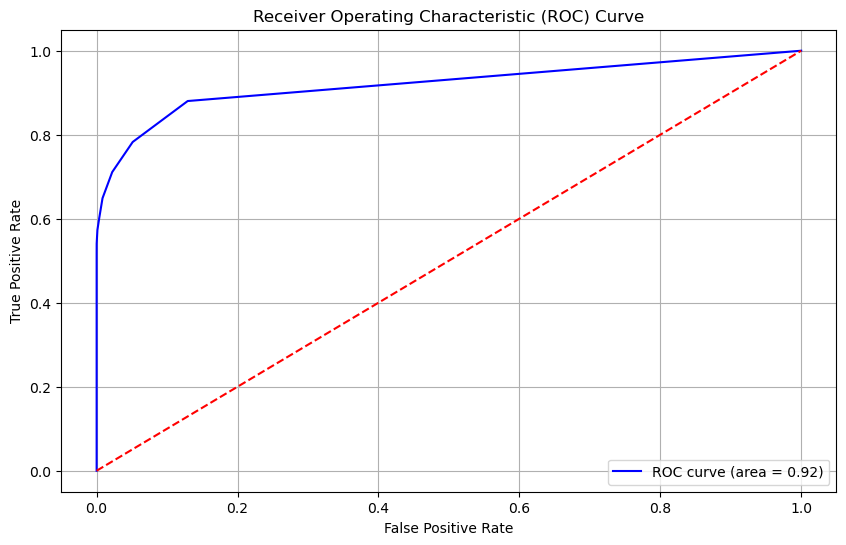

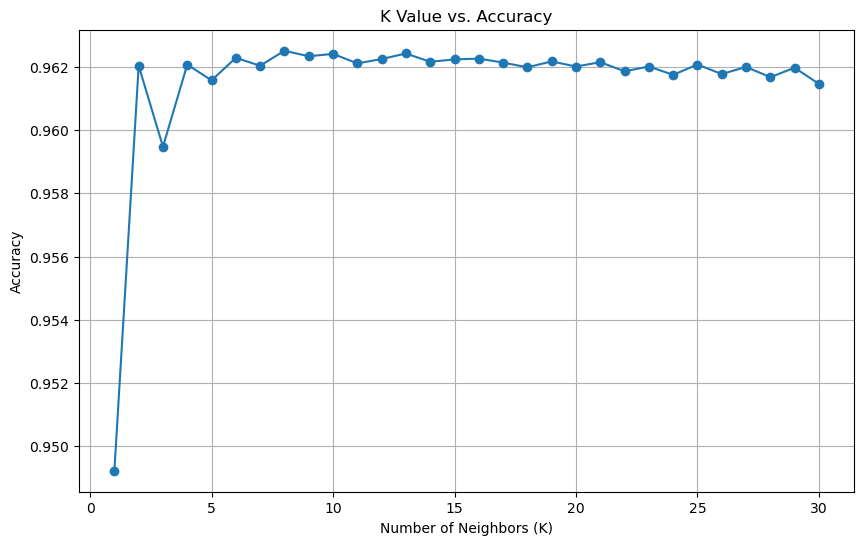

In [3]:

# Encode Gender variable
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
X = df.drop(columns=['diabetes'])
y = df['diabetes']

#Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setup the parameter grid for KNN
param_grid = {'n_neighbors': np.arange(1, 31)}

#Grid Search with Validation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Find best K value using grid search
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value of k is: {best_k}")

#predict
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve, auc

#ROC curve
y_prob = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#kvalue vs accuracy
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.title('K Value vs. Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


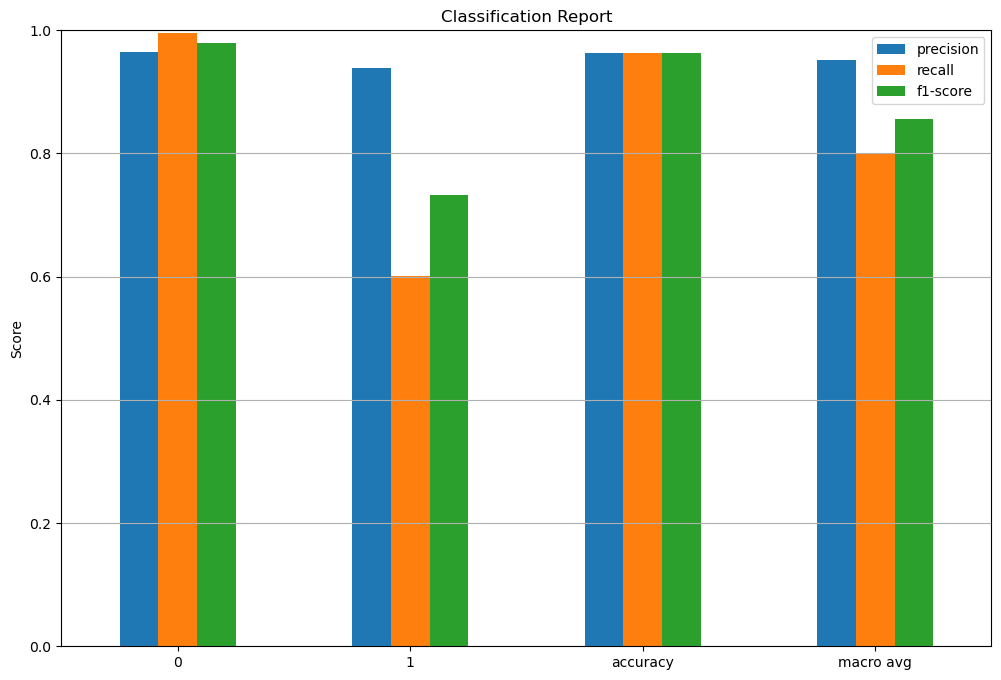

In [4]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:-1, :-1]

report_df.plot(kind='bar', figsize=(12, 8), ylim=(0, 1))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
